In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Considere o seguinte PVC
## x²y''(x) + xy'(x) − 4y(x) = 20x³, 1 < x < 2,
### y(1) = 0
### y(2) = 31

In [2]:
def PVF1(a, b, alpha, beta, p, q, f, h): 
    #Discretizando o intervalo (nesse caso, usando a e b)
    x = np.linspace(a, b, n+2)
    xi = x[1:-1]
    h2 = h**2
    
    #Cria matriz
    ai = -2 * np.ones((n,)) + h2 * q(xi) 
    bi = np.ones((n,)) - h/2 * p(xi)
    ci = np.ones((n,)) + h/2 * p(xi)
    A = np.diag(ai) + np.diag(bi[1:], -1) + np.diag(ci[:-1], 1)
    
    F = h2 * np.ones((n,)) * f(xi)
    F[0] -= alpha * bi[0]
    F[-1] -= beta * ci[-1]
    
    y = np.zeros((n+2,))
    y[0] = alpha
    y[-1] = beta
    
    #Montando e resolvendo o sistema linear
    y[1:-1] = np.linalg.solve(A, F)
    return y, x

In [3]:
a = 1
b = 2
alpha = 0
beta = 31
p = lambda x: 1/x
q = lambda x: -4/x**2
f = lambda x: 20*x
exata = lambda x: 4*(x**3 - 1/x**2)

## • (Prático) Construa um gráfico com a solução exata e a numérica para m = 3.

h = 0.16666666666666666


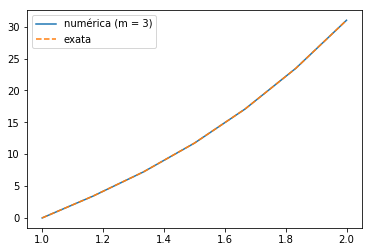

In [4]:
m = 3 #numero de incógnitas
n = m + 2 #numero de pontos
N = n + 1 #numero de sub espaços
h = (b-a)/N #tamanho do espaçamento

y, x = PVF1(a, b, alpha, beta, p, q, f, h)

plt.plot(x, y, label = 'numérica (m = 3)')
plt.plot(x, exata(x), '--', label = 'exata')
plt.legend()
print('h =', h)

## O que você observou? 
### R: No tópico anterior (teórico), foi visto que, se h < 2, o método de diferenças finitas tem uma única solução. Isso implica na estabilidade do método, e nesse caso (m=3), como h = 0.1667 < 2, vemos que, ao plotar a solução numérica, ela fica sobreposta à exata, ou seja, se aproxima muito dela, apresentando um erro muito baixo.

## • (Prático) Construa um gráfico, usando escala log-log, o máximo do erro (entre a solução exata e a numérica) como função do m, variando m = 3, 6, 12, 24, 48.

(m = 3) h = 0.16666666666666666
(m = 6) h = 0.1111111111111111
(m = 12) h = 0.06666666666666667
(m = 24) h = 0.037037037037037035
(m = 48) h = 0.0196078431372549


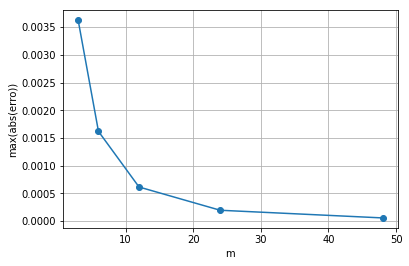

In [5]:
m = 3
n = m + 2
N = n + 1
h = (b-a)/N
y, x = PVF1(a, b, alpha, beta, p, q, f, h)
merr3 = max(np.abs(exata(x)-y))
print('(m = 3) h =', h)

m = 6
n = m + 2
N = n + 1
h = (b-a)/N
y, x = PVF1(a, b, alpha, beta, p, q, f, h)
merr6 = max(np.abs(exata(x)-y))
print('(m = 6) h =', h)

m = 12
n = m + 2
N = n + 1
h = (b-a)/N
y, x = PVF1(a, b, alpha, beta, p, q, f, h)
merr12 = max(np.abs(exata(x)-y))
print('(m = 12) h =', h)

m = 24
n = m + 2
N = n + 1
h = (b-a)/N
y, x = PVF1(a, b, alpha, beta, p, q, f, h)
merr24 = max(np.abs(exata(x)-y))
print('(m = 24) h =', h)

m = 48
n = m + 2
N = n + 1
h = (b-a)/N
y, x = PVF1(a, b, alpha, beta, p, q, f, h)
merr48 = max(np.abs(exata(x)-y))
print('(m = 48) h =', h)

plt.plot([3, 6, 12, 24, 48], [merr3, merr6, merr12, merr24, merr48], 'o-')
plt.xlabel('m')
plt.ylabel('max(abs(erro))')
#plt.yscale('log')
#plt.xscale('log')
plt.grid()

## Explique seus resultados.
### R: Observa-se que, quando aumentamos m, ou seja, diminuímos o h, o máximo do erro diminui. Isso está relacionado com a consistência do método, uma vez que quando h -> 0,  erro de trucamento local -> 0, dessa forma, o máximo do erro também -> 0. Além disso, esse comportamento está relacionado ao comportamento da solução numérica se manter estável, uma vez que h < 2 para os valores dados de m.

# ------------------------------------------
# 2. Considere o seguinte PVC com condição de contorno de Neumann
## y''(x) = 2, 0 < x < 1,
### y'(0) = 3
### y(1) = 6

In [6]:
def PVF2(l, del0, beta, f, h):
    n = int((l/h) - 1)
    
    #Discretizando o intervalo
    x = np.linspace(0, l, n+2)
    xi = x[1:-1]
    
    h2 = h**2
    
    #Cria matriz
    a = -2 * np.ones((n+1,))
    a[0] = -1
    b = c = np.ones((n+1,))
    A = np.diag(a) + np.diag(b[1:], -1) + np.diag(c[:-1], 1)

    F = h2 * np.ones((n+1,)) * f(xi)
    F[0] = del0 * h
    F[-1] -= beta * c[-1]
    
    y = np.zeros((n+2,))
    y[-1] = beta
    
    #Montando e resolvendo o sistema linear
    y[0:-1] = np.linalg.solve(A, F)
    return y, x

In [7]:
l = 1
del0 = 3
beta = 6
f = lambda x: 2
exata = lambda x: x**2 + 3*x + 2

## • (Prático) Construa um gráfico com a solução exata e a numérica para m = 6.

h = 0.16666666666666666


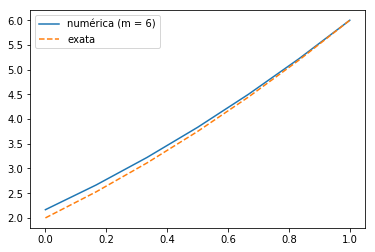

In [8]:
m = 6 #numero de incógnitas
n = m + 1 #numero de pontos
N = m #numero de sub espaços
h = (b-a)/N #tamanho do espaçamento

y, x = PVF2(l, del0, beta, f, h)

plt.plot(x, y, label = 'numérica (m = 6)')
plt.plot(x, exata(x), '--', label = 'exata')
plt.legend()
print('h =', h)

## O que você observou?
### R: Observa-se que, a solução numérica se aproxima da solução exada para valores próximos do ponto 1. Porém, quando é analisada a solução para o outro extremo (x = 0), existe uma diferença dessa solução com a solução exata, isso se deve ao fato de que foi feito uma aproximação numérica para y'(0) e, com isso, obtemos uma equação utilizada no sistema linear para y0, que, nesse caso de PVC, se tornou uma incógnita. Dessa forma, para x próximo de 1 o erro diminuí, uma vez que sabemos o valor da função nesse ponto. Porém, para x próximo de 0, que sabemos apenas a derivada nesse ponto, o erro não se aproxima de zero, já que foi feito uma aproximação para a função nesse ponto.  

## • (Prático) Construa um gráfico, usando escala log-log, o máximo do erro (entre a solução exata e a numérica) como função do m, variando m = 6, 12, 24.

(m = 6) h = 0.16666666666666666
(m = 12) h = 0.08333333333333333
(m = 24) h = 0.041666666666666664


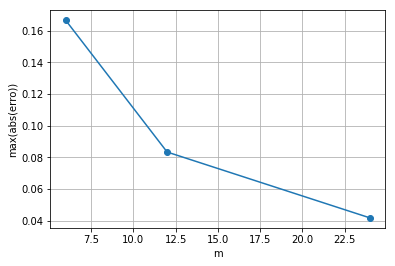

In [9]:
m = 6
N = m
h = (b-a)/N
y, x = PVF2(l, del0, beta, f, h)
merr6 = max(np.abs(exata(x)-y))
print('(m = 6) h =', h)

m = 12
N = m
h = (b-a)/N
y, x = PVF2(l, del0, beta, f, h)
merr12 = max(np.abs(exata(x)-y))
print('(m = 12) h =', h)

m = 24
N = m
h = (b-a)/N
y, x = PVF2(l, del0, beta, f, h)
merr24 = max(np.abs(exata(x)-y))
print('(m = 24) h =', h)

plt.plot([6, 12, 24], [merr6, merr12, merr24], 'o-')
plt.xlabel('m')
plt.ylabel('max(abs(erro))')
#plt.yscale('log')
#plt.xscale('log')
plt.grid()

## Explique seus resultados.
### R: A respeito da mudança do m, observa-se que quando aumentamos m, ou seja, diminuímos o h, o máximo do erro diminui. Isso está relacionado com a consistência do método, uma vez que quando h -> 0,  erro de trucamento local -> 0, dessa forma, o máximo do erro também -> 0.